**ANN-NHẬN DIỆN BẢN THÂN**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import glob
import cv2
import numpy as np

x_train = []
x_test = []
y_train = []
y_test = []

dem = 0
for imgpath in glob.glob('/content/drive/MyDrive/Colab Notebooks/BanThinh/*.bmp'):
  n = cv2.imread(imgpath)

  if dem%10 == 0:
    x_test.append(n)
    y_test.append(0)
  else:
    x_train.append(n)
    y_train.append(0)
  dem += 1
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)

# y_train, y_test là output (như đánh label cho ảnh x_train, x_test á)


y_test = np.array(y_test)
y_train = list(y_train)

KeyboardInterrupt: ignored

In [ ]:
print(y_train)
print(y_test)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0 0 0 0 0 0 0 0 0 0]


0


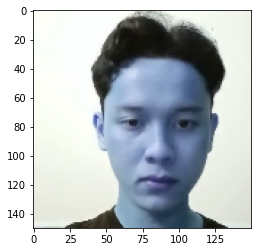

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_test[9])
print(y_test[9])

In [ ]:
print(x_train.shape)
#print(y_train.shape)
print(y_test.shape)
print(x_test.shape)


(84, 150, 150, 3)
(10,)
(10, 150, 150, 3)


In [ ]:
a = np.array([[1], [2], [3], [4]])
print(a)
m = np.delete(a, 2)
print(m)
a = list(a)
print(a)

[[1]
 [2]
 [3]
 [4]]
[1 2 4]
[array([1]), array([2]), array([3]), array([4])]


In [ ]:
from keras.utils.np_utils import to_categorical

x_train = x_train.reshape(84, 67500)
x_test = x_test.reshape(10, 67500)
# Chuyen don vi mau thanh so thuc
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Chuyen anh trang den
x_train /= 255
x_test /= 255

# ...to_categorical(y_train, 3) với 3: số phần tử output
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
from tensorflow.keras.optimizers import RMSprop
from keras.layers import Dense, Activation, BatchNormalization, Dropout
from keras.models import Sequential
model = Sequential()
model.add(Dense(512, kernel_initializer='normal', activation='relu', input_shape=(67500,)))  # 784: số tín hiệu đầu vào
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2)) # Không cần Dropout cũng đc :D?
model.add(Dense(1, activation='softmax')) 
# model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=64, epochs=30, verbose=1, validation_data=(x_test, y_test))  # verbose = 0: trong qua trinh hoc ko hien thi ra man hinh, = 1: hien thi ..., = 2: hien thi 1/500:..., 2/500:...

Epoch 1/30
2/2 [==============================] - 4s 275ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/30
2/2 [==============================] - 0s 73ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/30
2/2 [==============================] - 0s 73ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/30
2/2 [==============================] - 0s 74ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/30
2/2 [==============================] - 0s 68ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/30
2/2 [==============================] - 0s 71ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/30
2/2 [==============================] - 0s 69ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.00

In [ ]:
model.save('faceDetection.h5')

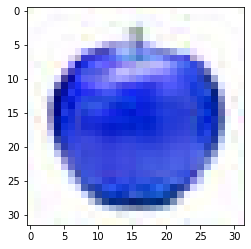

In [ ]:
import cv2
img = cv2.imread(r'test.jpg')
plt.imshow(img)

(150, 150, 3)


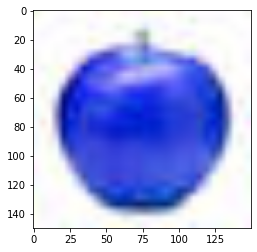

In [ ]:
img_re = cv2.resize(img, (150,150))
plt.imshow(img_re)
print(img_re.shape)

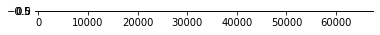

In [ ]:
x_test_c = img_re.reshape(-1, 67500) 
x_test_c = x_test_c.astype('float32')
x_test_c /= 255
plt.imshow(x_test_c)

In [ ]:
y_pred = model.predict(x_test_c)
# print(y_test)
# acc_num_class0 = y_pred[0]
# acc_num_class1 = y_pred[1]
# np.max
print(y_pred)

[[1.]]


In [ ]:
y_pred = model.predict(x_test_c)
print(y_pred)

[[1.]]


In [ ]:
score = model.evaluate(x_test_c, y_pred, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0
Test accuracy: 1.0


**CNN-NHẬN DIỆN 3 NGƯỜI**

**LIÊN KẾT VỚI DRIVE**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**TẠO DỮ LIỆU**

In [ ]:
import glob
import cv2
import numpy as np

x_train = []
x_test = []
y_train = []

dem = 0
for imgpath in glob.glob('/content/drive/MyDrive/Colab Notebooks/TEAM/*.bmp'):
  n = cv2.imread(imgpath)
  if dem%10 == 0:
    x_test.append(n)
  else:
    x_train.append(n)
  name1 = 'BanThinh'
  name2 = 'BanHung'
  name3 = 'BanTuan'
  if name1 in imgpath:
    y_train.append([0])
  elif name2 in imgpath:
    y_train.append([1])
  elif name3 in imgpath:
    y_train.append([2])
  dem += 1
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)

# y_train, y_test là output (như đánh label cho ảnh x_train, x_test á)
# y_train, y_test chỉ được đánh số từ 0 cho các đối tượng (output): VD Thinh đánh số 0, Hung số 1, Tuan số 2

y_test = []
i = 0
while x_train.shape[0] < y_train.shape[0]:
  y_test.append(y_train[i])
  y_train = np.delete(y_train, i)
  i += 9
y_test = np.array(y_test)
y_train = list(y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


[1. 0. 0.]


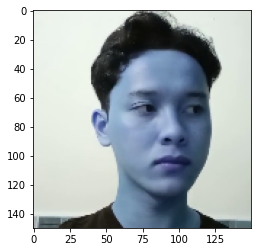

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_test[1])
print(y_test[1])

**Chuẩn hoá dữ liệu**

In [ ]:
from keras.utils.np_utils import to_categorical

# Chuyen don vi mau thanh so thuc
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Chuyen anh trang den
x_train /= 255
x_test /= 255

y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

In [ ]:
from tensorflow.keras.optimizers import RMSprop
from keras.layers import Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(250,250,3)))  # 32: số lần dùng bộ lọc (filter - mảng 3x3)
                                                                                                                         # kernel_initializer='he_uniform': setup bộ lọc ban đầu với dạng he_uni...
                                                                                                                         # padding='same': để khi pad mảng filter ảnh sẽ ko bị thay đổi kích thước.
model.add(MaxPooling2D((2,2)))                                                                                                                         

model = Sequential()
model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))  # 32: số lần dùng bộ lọc (filter - mảng 3x3)
                                                                                                                         # kernel_initializer='he_uniform': setup bộ lọc ban đầu với dạng he_uni...
                                                                                                                         # padding='same': để khi pad mảng filter ảnh sẽ ko bị thay đổi kích thước.
model.add(MaxPooling2D((2,2)))                                                                                                                         

model = Sequential()
model.add(Conv2D(128, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))  # 32: số lần dùng bộ lọc (filter - mảng 3x3)
                                                                                                                         # kernel_initializer='he_uniform': setup bộ lọc ban đầu với dạng he_uni...
                                                                                                                         # padding='same': để khi pad mảng filter ảnh sẽ ko bị thay đổi kích thước.
model.add(MaxPooling2D((2,2)))                                                                                                                         


In [ ]:
from keras.layers import Dense
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))  # Dense: full-connected (tất cả các tế bào thần kinh đều kết nối với nhau)
model.add(Dense(3, activation='softmax'))

In [ ]:
from tensorflow.keras.optimizers import SGD
opt = SGD(lr=0.01, momentum=0.9)  # lr: learning rate: tốc độ học, momentum: momen động lượng, sự dao động
# Biên dịch
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics='accuracy')
# Training
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test), verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
4/4 [==============================] - 12s 420ms/step - loss: 221.6562 - accuracy: 0.3074 - val_loss: 0.8802 - val_accuracy: 0.6071
Epoch 2/10
4/4 [==============================] - 0s 103ms/step - loss: 0.5947 - accuracy: 0.8934 - val_loss: 0.1737 - val_accuracy: 1.0000
Epoch 3/10
4/4 [==============================] - 0s 101ms/step - loss: 0.0989 - accuracy: 1.0000 - val_loss: 0.0165 - val_accuracy: 1.0000
Epoch 4/10
4/4 [==============================] - 0s 103ms/step - loss: 0.0114 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 5/10
4/4 [==============================] - 0s 105ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 7.6449e-04 - val_accuracy: 1.0000
Epoch 6/10
4/4 [==============================] - 0s 102ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 3.0848e-04 - val_accuracy: 1.0000
Epoch 7/10
4/4 [==============================] - 0s 101ms/step - loss: 5.3937e-04 - accuracy: 1.0000 - val_loss: 1.6431e-04 - val_accuracy: 1.0000
E

**TEST**

[[2.7353399e-05 9.9992394e-01 4.8772614e-05]]


array([1])

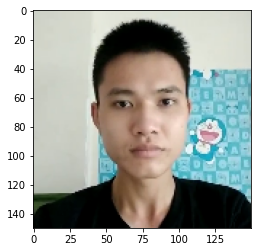

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

img = load_img('test8.jpg', target_size=(150,150))  
plt.imshow(img)

img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img /= 255
print(model.predict(img))
np.argmax(model.predict(img), axis=1)

[[7.8543389e-01 2.1414992e-01 4.1622776e-04]]


array([0])

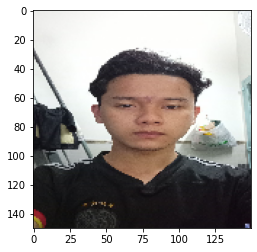

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

img = load_img('test10.jpg', target_size=(150,150))  
plt.imshow(img)

img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img /= 255
print(model.predict(img))
np.argmax(model.predict(img), axis=1)

[[5.626585e-04 2.291142e-04 9.992083e-01]]


array([2])

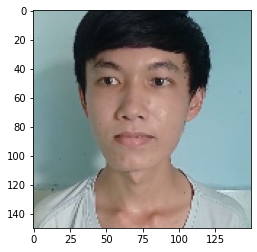

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

img = load_img('Tuan.jpg', target_size=(150,150))  
plt.imshow(img)

img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img /= 255
print(model.predict(img))
np.argmax(model.predict(img), axis=1)

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.00023768912069499493
Test accuracy: 1.0
